In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [90]:
with open("ttt.ANO", 'r') as f:
    s = f.read()
s

'********************************************************************************\n***                       Micro-Cap 11.2.0.3 (64 bit)                        ***\n***                                                                          ***\n***                                                                          ***\n***                            AC Analysis of ttt                            ***\n***                          4/18/2024 12:14:02 PM                           ***\n********************************************************************************\nLimits\n======\nFrequency Range          Linear 1,1E-3\nNumber of Points         1001\nTemperature              Linear 27\nMaximum Change %         5\nNoise Input              None\nNoise Output             2\nRun Options              Normal\nState Variables          Zero\nOperating Point          On\nAuto Scale Ranges        Off\nAccumulate Plots         Off\nIgnore Expression Errors Off\n\n\n****************************

In [91]:
wfs = """Waveform Values
===============
"""
sti = s.find(wfs) + len(wfs)
raw_data = s[sti:]
raw_data

'    re(v(13))   im(v(13))   re(v(19))   im(v(19))           F  abs(v(13))   ph(v(13))  abs(v(19))   ph(v(19))\n          (V)         (V)         (V)         (V)        (Hz)         (V)   (Degrees)         (V)   (Degrees)\n   -1.624E-01  -2.112E+01  -1.584E-02  -2.076E+01   1.000E-03   2.112E+01          NA   2.076E+01          NA\n   -1.646E-01  -1.059E+01  -1.644E-02  -1.040E+01   1.999E-03   1.059E+01  -9.089E+01   1.040E+01  -9.009E+01\n   -1.681E-01  -7.086E+00  -1.742E-02  -6.951E+00   2.998E-03   7.088E+00  -9.136E+01   6.951E+00  -9.014E+01\n   -1.730E-01  -5.343E+00  -1.881E-02  -5.231E+00   3.997E-03   5.346E+00  -9.185E+01   5.231E+00  -9.021E+01\n   -1.793E-01  -4.303E+00  -2.061E-02  -4.203E+00   4.996E-03   4.307E+00  -9.239E+01   4.203E+00  -9.028E+01\n   -1.868E-01  -3.614E+00  -2.281E-02  -3.521E+00   5.995E-03   3.619E+00  -9.296E+01   3.521E+00  -9.037E+01\n   -1.957E-01  -3.125E+00  -2.542E-02  -3.037E+00   6.994E-03   3.131E+00  -9.358E+01   3.037E+00  -9.048E+01\n

In [92]:
header, _, *parsed_data = tuple(tuple(filter(bool, line.strip().replace("NA", "0").split('  '))) for line in raw_data.strip().split('\n'))
header, parsed_data

(('re(v(13))',
  ' im(v(13))',
  ' re(v(19))',
  ' im(v(19))',
  ' F',
  'abs(v(13))',
  ' ph(v(13))',
  'abs(v(19))',
  ' ph(v(19))'),
 [('-1.624E-01',
   '-2.112E+01',
   '-1.584E-02',
   '-2.076E+01',
   ' 1.000E-03',
   ' 2.112E+01',
   '0',
   ' 2.076E+01',
   '0'),
  ('-1.646E-01',
   '-1.059E+01',
   '-1.644E-02',
   '-1.040E+01',
   ' 1.999E-03',
   ' 1.059E+01',
   '-9.089E+01',
   ' 1.040E+01',
   '-9.009E+01'),
  ('-1.681E-01',
   '-7.086E+00',
   '-1.742E-02',
   '-6.951E+00',
   ' 2.998E-03',
   ' 7.088E+00',
   '-9.136E+01',
   ' 6.951E+00',
   '-9.014E+01'),
  ('-1.730E-01',
   '-5.343E+00',
   '-1.881E-02',
   '-5.231E+00',
   ' 3.997E-03',
   ' 5.346E+00',
   '-9.185E+01',
   ' 5.231E+00',
   '-9.021E+01'),
  ('-1.793E-01',
   '-4.303E+00',
   '-2.061E-02',
   '-4.203E+00',
   ' 4.996E-03',
   ' 4.307E+00',
   '-9.239E+01',
   ' 4.203E+00',
   '-9.028E+01'),
  ('-1.868E-01',
   '-3.614E+00',
   '-2.281E-02',
   '-3.521E+00',
   ' 5.995E-03',
   ' 3.619E+00',
   '-9.296

In [93]:
data = np.array(parsed_data, dtype=np.float32)
data.shape, data

((1001, 9),
 array([[-1.624e-01, -2.112e+01, -1.584e-02, ...,  0.000e+00,  2.076e+01,
          0.000e+00],
        [-1.646e-01, -1.059e+01, -1.644e-02, ..., -9.089e+01,  1.040e+01,
         -9.009e+01],
        [-1.681e-01, -7.086e+00, -1.742e-02, ..., -9.136e+01,  6.951e+00,
         -9.014e+01],
        ...,
        [-5.068e-06,  2.458e-06, -4.876e-05, ..., -9.259e+02,  4.885e-05,
         -8.965e+02],
        [-5.018e-06,  2.485e-06, -4.851e-05, ..., -9.263e+02,  4.858e-05,
         -8.970e+02],
        [-4.967e-06,  2.512e-06, -4.826e-05, ..., -9.268e+02,  4.831e-05,
         -8.975e+02]], dtype=float32))

In [94]:
pi_re, pi_im, pid_re, pid_im, F, pi_abs, pi_phi, pid_abs, pid_phi = data.T
pi_re, pi_im, pid_re, pid_im

(array([-1.624e-01, -1.646e-01, -1.681e-01, ..., -5.068e-06, -5.018e-06,
        -4.967e-06], dtype=float32),
 array([-2.112e+01, -1.059e+01, -7.086e+00, ...,  2.458e-06,  2.485e-06,
         2.512e-06], dtype=float32),
 array([-1.584e-02, -1.644e-02, -1.742e-02, ..., -4.876e-05, -4.851e-05,
        -4.826e-05], dtype=float32),
 array([-2.076e+01, -1.040e+01, -6.951e+00, ..., -2.992e-06, -2.552e-06,
        -2.117e-06], dtype=float32))

In [95]:
def get_closest_to_circle(x, y):
    points = np.vstack((x, y)).T
    idx = abs(np.linalg.norm(points, axis=1) - 1).argmin()
    return points[idx]

In [96]:
def get_closest_to_x(x, y):
    indexes = np.abs(y) < 0.1
    idx = x[indexes].argmin()
    points = np.vstack((x, y)).T[indexes]
    return points[idx]

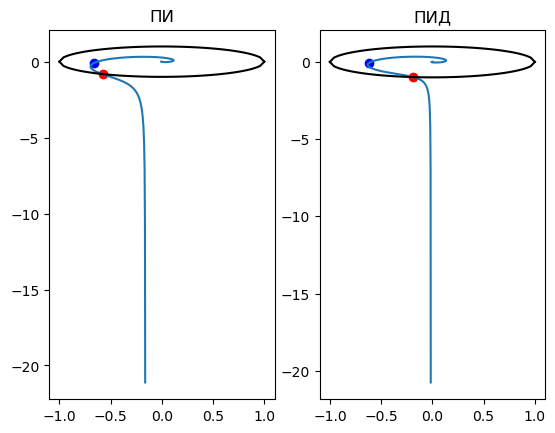

In [97]:
x = np.linspace(-1, 1)
circle = np.sqrt(1 - x**2)
pi_circle = get_closest_to_circle(pi_re, pi_im)
pi_alpha = get_closest_to_x(pi_re, pi_im)
pid_circle = get_closest_to_circle(pid_re, pid_im)
pid_alpha = get_closest_to_x(pid_re, pid_im)
plt.subplot(121)
plt.title("ПИ")
plt.plot(pi_re, pi_im)
plt.plot(x, circle, 'black')
plt.plot(x, -circle, 'black')
plt.scatter(*pi_circle, c="red")
plt.scatter(*pi_alpha, c="blue")
# plt.scatter(, c="red")
plt.subplot(122)
plt.title("ПИД")
plt.plot(pid_re, pid_im)
plt.plot(x, circle, 'black')
plt.plot(x, -circle, 'black')
plt.scatter(*pid_circle, c="red")
plt.scatter(*pid_alpha, c="blue")

In [98]:
pi_Ka = 20 * np.log10(1 / np.abs(pi_alpha[0]))
pi_Ka2 = 20 * np.log10(1 / pi_abs[np.abs(pi_phi + 180).argmin()])
pid_Ka = 20 * np.log10(1 / np.abs(pid_alpha[0]))
pid_Ka2 = 20 * np.log10(1 / pid_abs[np.abs(pid_phi + 180).argmin()])
(pi_Ka, pi_Ka2), (pid_Ka, pid_Ka2)

((3.5318198066415, 4.056034364057437), (4.126985569922146, 4.4138435736273856))

In [99]:
pi_dphi = np.degrees(np.arctan2(pi_circle[1], pi_circle[0]) + np.pi)
pid_dphi = np.degrees(np.arctan2(pid_circle[1], pid_circle[0]) + np.pi)
pi_dphi2 = pi_phi[np.abs(pi_abs - 1).argmin()] + 180
pid_dphi2 = pid_phi[np.abs(pid_abs - 1).argmin()] + 180
(pi_dphi, pi_dphi2), (pid_dphi, pid_dphi2)

((55.32063406032004, 55.30000305175781),
 (79.32867386083399, 79.30000305175781))

In [100]:
T = 0
K = 1.18
Ti = 12.8 / 2
# T = 1.2
# K = 0.88
# Ti = 16.2 / 2
# T = 2.4
# K = 0.79
# Ti = 19.5 / 2

In [101]:
pickle.dump((
    (K, Ti, pi_Ka, pi_dphi),
    (K, Ti, pi_Ka2, pi_dphi2),
    (K, Ti, pid_Ka, pid_dphi),
    (K, Ti, pid_Ka2, pid_dphi2),
    ), open(f"ttt{T}.pickle", 'wb'))